# Confidence bands for MPH landscapes

In [1]:
import numpy as np
from tqdm import tqdm
from plotting import plot_3d, plot_confidence_band_multi, plot_confidence_band_single
from sampling_functions import sample_torus, add_gaussian_noise, add_salt_and_pepper_noise, normalize_point_cloud
from utils_PH import compute_single_parameter_landscape, compute_multiparameter_landscape

[KeOps] Warning : cuda was detected, but driver API could not be initialized. Switching to cpu only.


## Sample synthetic data with noise

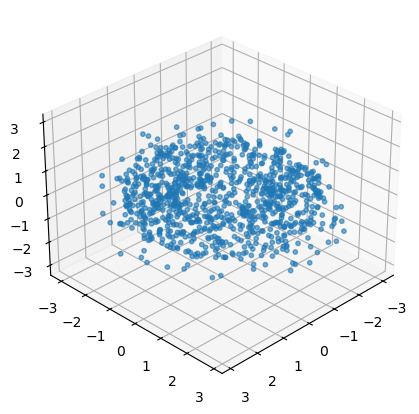

In [2]:
# Sample points over the torus
points = sample_torus(R=2, r=0.7, num_points=1000)

# Add noise
points = add_gaussian_noise(points=points, noise_level=0.1)
points = add_salt_and_pepper_noise(points=points, fraction=0.5, amount=0.5)

# Plot
plot_3d(points=points)

## Generate a dataset with $n$ samples and compute landscapes

In [3]:
num_samples = 100
box = [[0,0.7], [0.5,1.7]]
ks = 3
resolution = 100

# Create holders for the landscapes of the samples
single_landscapes = np.empty((num_samples, ks, resolution))
multi_landscapes = np.empty((num_samples, ks, resolution, resolution))

for i in tqdm(range(num_samples)):
    # Sample points over the torus
    points = sample_torus(R=2, r=0.7, num_points=500)

    # Add noise
    points = add_gaussian_noise(points=points, noise_level=0.1)
    points = add_salt_and_pepper_noise(points=points, fraction=0.5, amount=0.5)
    points = normalize_point_cloud(points) # to have control over the scale parameter in computing landscapes

    # Compute landscapes
    single_landscapes[i,:,:] = compute_single_parameter_landscape(points, hom_degree=1, ks=ks, resolution=resolution, sample_range=[0, 0.5])
    multi_landscapes[i,:,:,:] = compute_multiparameter_landscape(points, bandwidth=0.5, threshold_radius=0.5, hom_degree=1, ks=ks, resolution=resolution, box=box)

print(f'Shape of the single-parameter landscapes: {single_landscapes.shape}')
print(f'Shape of the multiparameter landscapes: {multi_landscapes.shape}')

100%|██████████| 100/100 [06:17<00:00,  3.78s/it]

Shape of the single-parameter landscapes: (100, 3, 100)
Shape of the multiparameter landscapes: (100, 3, 100, 100)


## Plot confidence bands

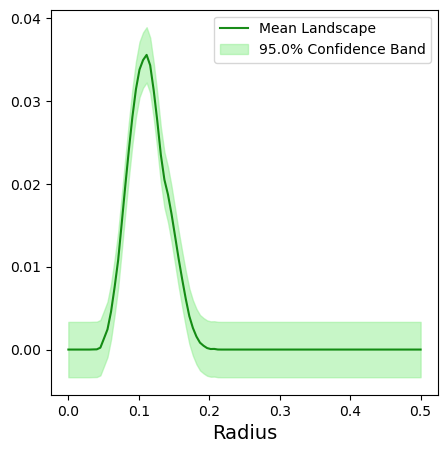

In [4]:
plot_confidence_band_single(single_landscapes, sample_range=[0, 0.5], type='standard', k=1)

/mnt/c/code/bands-mph-landscapes/plotting.py:80: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()
/home/inesgare/anaconda3/envs/mph-mnist/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


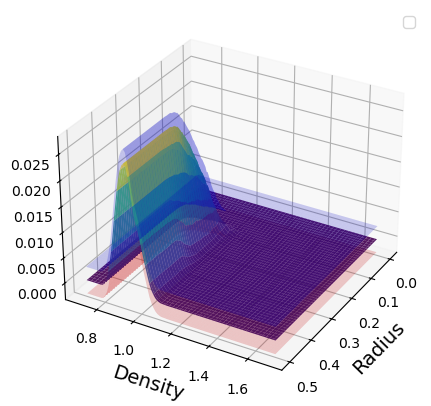

In [5]:
plot_confidence_band_multi(multi_landscapes, box=box, type='standard', k=1)